In [1]:
from PIL import Image
from PIL.ExifTags import TAGS
import numpy as np
import matplotlib.pyplot as plt 

ResolutionUnit           : 2
ExifOffset               : 216
Make                     : FLIR Systems AB
Model                    : FLIR i50
Software                 : Common_dll v1.1.9b1
Orientation              : 1
DateTime                 : 2023:02:09 14:44:25
YCbCrPositioning         : 1
XResolution              : 72.0
YResolution              : 72.0


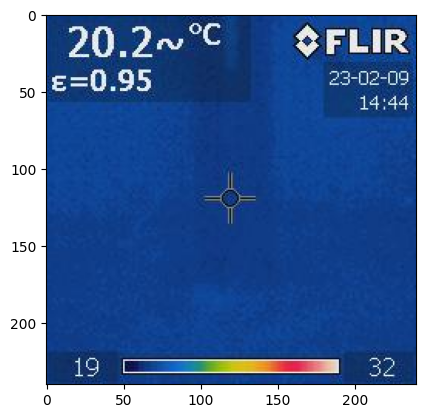

In [2]:
image = Image.open('test.jpg')

exifdata = image.getexif()
# iterating over all EXIF data fields
for tag_id in exifdata:
    # get the tag name, instead of human unreadable tag id
    tag = TAGS.get(tag_id, tag_id)
    data = exifdata.get(tag_id)
    # decode bytes 
    if isinstance(data, bytes):
        data = data.decode()
    print(f"{tag:25}: {data}")

array = np.asarray(image)
plt.imshow(array)

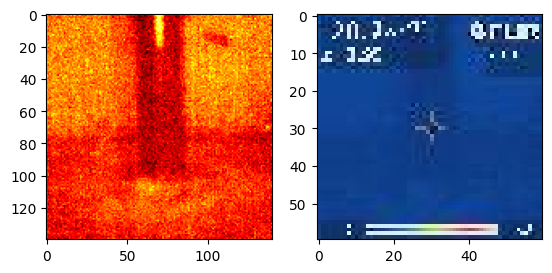

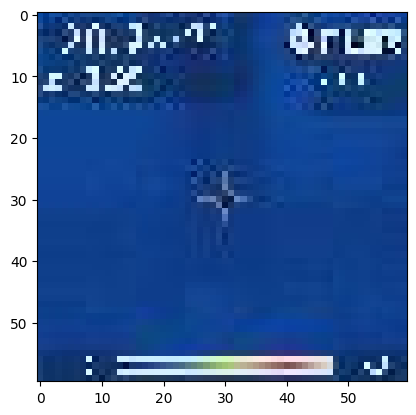

In [11]:
import flir_image_extractor
fir = flir_image_extractor.FlirImageExtractor()
fir.process_image('test.jpg')
fir.plot()
rgb = fir.get_rgb_np()
thermal1 = fir.get_thermal_np()
plt.imshow(rgb)

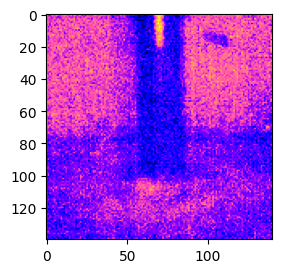

In [12]:
import flirimageextractor
from matplotlib import cm

flir = flirimageextractor.FlirImageExtractor(palettes=[cm.jet, cm.bwr, cm.gist_ncar])
flir.process_image('test.jpg')
thermal2 = flir.get_thermal_np()
